<a href="https://colab.research.google.com/github/EjbejaranosAI/AI_trends_2023/blob/main/DL_summer_Canarias/QML/Quantum_computing_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.2
    Uninstalling autograd-1.6.2:
      Successfully uninstalled autograd-1.6.2


In [2]:
import pennylane as qml

def my_quantum_function(x,y):
  qml.RZ(x, wires=0)
  qml.CNOT(wires=[0,1])
  qml.RY(y, wires=1)
  return qml.expval(qml.PauliZ(1))

In [5]:
qm_result = my_quantum_function(4,5)

In [6]:
print(qm_result)

expval(PauliZ(wires=[1]))


Defining a device

In [7]:
dev = qml.device('default.qubit', wires=2, shots=1000)

In [8]:
def my_quantum_function(x, y):
    qml.RZ(x, wires='q1')
    qml.CNOT(wires=['aux' ,'q1'])
    qml.RY(y, wires='q2')
    return qml.expval(qml.PauliZ('q2'))

In [9]:
shots_list = [5, 10, 1000]
dev = qml.device("default.qubit", wires=2, shots=shots_list)

In [10]:
print(dev)

Default qubit PennyLane plugin
Short name: default.qubit
Package: pennylane
Plugin version: 0.31.0
Author: Xanadu Inc.
Wires: 2
Shots: 1015


Creating a quantum node

In [12]:
dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])
circuit = qml.QNode(my_quantum_function, dev_unique_wires)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
circuit(np.pi/4, 0.7)

tensor(0.76484219, requires_grad=True)

In [17]:
print(qml.draw(circuit)(np.pi/4, 0.7))

aux: ───────────╭●─┤     
 q1: ──RZ(0.79)─╰X─┤     
 q2: ──RY(0.70)────┤  <Z>


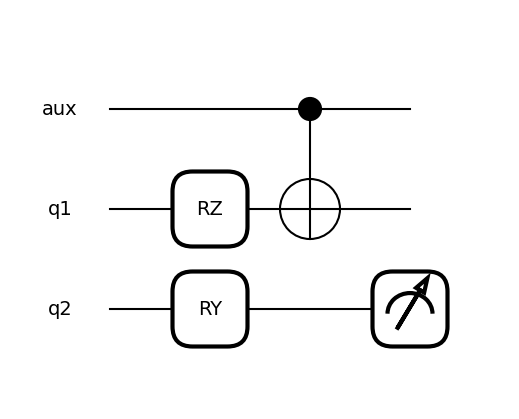

In [19]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(np.pi/4, 0.7)
plt.show()

Qnode decorator

In [21]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(x):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(x, wires=1)
    return qml.expval(qml.PauliZ(1))

result = circuit(0.543)
print(result)

0.8561624160163042


In [24]:
import pennylane as qml
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

dev = qml.device('forest.qpu', wires=2)

hadamard_qasm = 'OPENQASM 2.0;' \
                'include "qelib1.inc";' \
                'qreg q[1];' \
                'h q[0];'

apply_hadamard = qml.from_qasm(hadamard_qasm)

@qml.qnode(dev)
def circuit_with_hadamards():
    apply_hadamard(wires=[0])
    apply_hadamard(wires=[1])
    qml.Hadamard(wires=[1])
    return qml.expval(qml.PauliX(0)), qml.expval(qml.PauliX(1))

result = circuit_with_hadamards()

ModuleNotFoundError: ignored